Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
import sys
from pathlib import Path

parent_dir = Path.cwd().parent.parent

if str(parent_dir) not in sys.path:
    sys.path.insert(0, str(parent_dir))
from shared.metrics import print_evaluation_metrics
from shared.helpers import store_model

Load dataset and prepare df

In [2]:
file_path = "../data/parsed_dataset.csv"
date_column = "Date"
target_column = "Close"
df = pd.read_csv(file_path, parse_dates=True)

df.set_index(date_column, inplace=True)

dates = df.index.values
df = df.select_dtypes(exclude=["object"])

Train test split

In [3]:
data_length = len(df)
train_split = 0.9
train = df.iloc[:int(data_length*train_split)]
test = df.iloc[int(data_length*train_split):]

Create the model

In [4]:
model = LinearRegression().fit(
    train.drop(columns=[target_column]), train[target_column]
)

In [5]:
pred = model.predict(test.drop(columns=[target_column]))

Plot the result

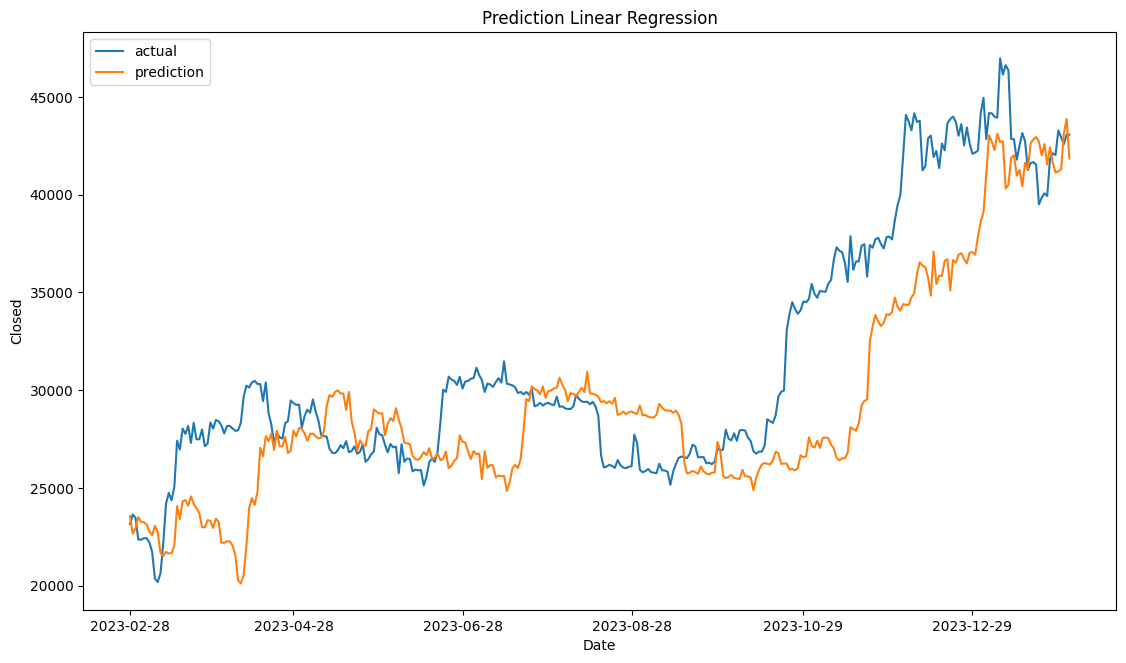

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(1280 / 96, 720 / 96))
ax.plot(dates[int(data_length*train_split):], test[target_column].values, label="actual")
ax.plot(dates[int(data_length*train_split):], pred, label="prediction")
ax.set_title("Prediction Linear Regression")
ax.set_ylabel("Closed")
ax.set_xlabel(date_column)
ax.legend()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.show()

RMSE of the result

In [9]:
print_evaluation_metrics(pred, test[target_column], train[target_column])

Evaluation Metrics:
MSE: 17515342.08
RMSE: 4185.13
MAE: 3258.37
MAPE: 9.98
SMAPE: 10.64
MASE: 9.04


In [8]:
store_model(model, "regression")